In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

In [2]:
df = pd.read_csv('world-happiness-report.csv')
gf = pd.read_csv('dataset1.csv')

In [3]:
display(df) #training data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [4]:
display(gf) #2021 data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [5]:
countries7 = [] #2021 data

for rows in gf.index:
    if gf['Regional indicator'][rows] not in countries7:
        countries7.append(gf['Regional indicator'][rows])

len(countries7)

10

In [6]:
d = {} #2021 data

for rows in gf.index:
    if gf['Regional indicator'][rows] not in d.keys():
        d[gf['Regional indicator'][rows]] = []
        d[gf['Regional indicator'][rows]].append(gf['Country name'][rows])
    else: 
        d[gf['Regional indicator'][rows]].append(gf['Country name'][rows])

print(d)


{'Western Europe': ['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Luxembourg', 'Austria', 'Germany', 'Ireland', 'United Kingdom', 'Belgium', 'France', 'Malta', 'Spain', 'Italy', 'Cyprus', 'Portugal', 'Greece', 'North Cyprus'], 'North America and ANZ': ['New Zealand', 'Australia', 'Canada', 'United States'], 'Middle East and North Africa': ['Israel', 'Bahrain', 'United Arab Emirates', 'Saudi Arabia', 'Kuwait', 'Libya', 'Turkey', 'Morocco', 'Algeria', 'Iraq', 'Iran', 'Tunisia', 'Lebanon', 'Palestinian Territories', 'Jordan', 'Egypt', 'Yemen'], 'Latin America and Caribbean': ['Costa Rica', 'Guatemala', 'Uruguay', 'Brazil', 'Mexico', 'Jamaica', 'Panama', 'Chile', 'El Salvador', 'Colombia', 'Nicaragua', 'Argentina', 'Honduras', 'Peru', 'Ecuador', 'Bolivia', 'Paraguay', 'Dominican Republic', 'Venezuela', 'Haiti'], 'Central and Eastern Europe': ['Czech Republic', 'Slovenia', 'Kosovo', 'Slovakia', 'Lithuania', 'Estonia', 'Poland', 'Romania', 'Serbia', 'Lat

In [7]:
#2021 data
L1 = ['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Netherlands', 'Norway', 'Sweden', 'Luxembourg', 'Austria', 'Germany', 'Ireland', 'United Kingdom', 'Belgium', 'France', 'Malta', 'Spain', 'Italy', 'Cyprus', 'Portugal', 'Greece', 'North Cyprus']
L2 = ['New Zealand', 'Australia', 'Canada', 'United States']
L3 = ['Israel', 'Bahrain', 'United Arab Emirates', 'Saudi Arabia', 'Kuwait', 'Libya', 'Turkey', 'Morocco', 'Algeria', 'Iraq', 'Iran', 'Tunisia', 'Lebanon', 'Palestinian Territories', 'Jordan', 'Egypt', 'Yemen']
L4 = ['Costa Rica', 'Guatemala', 'Uruguay', 'Brazil', 'Mexico', 'Jamaica', 'Panama', 'Chile', 'El Salvador', 'Colombia', 'Nicaragua', 'Argentina', 'Honduras', 'Peru', 'Ecuador', 'Bolivia', 'Paraguay', 'Dominican Republic', 'Venezuela', 'Haiti']
L5 = ['Czech Republic', 'Slovenia', 'Kosovo', 'Slovakia', 'Lithuania', 'Estonia', 'Poland', 'Romania', 'Serbia', 'Latvia', 'Hungary', 'Croatia', 'Bosnia and Herzegovina', 'Montenegro', 'Bulgaria', 'Albania', 'North Macedonia']
L6 = ['Taiwan Province of China', 'Japan', 'South Korea', 'Mongolia', 'Hong Kong S.A.R. of China', 'China']
L7 = ['Singapore', 'Thailand', 'Philippines', 'Vietnam', 'Malaysia', 'Indonesia', 'Laos', 'Cambodia', 'Myanmar']
L8 = ['Uzbekistan', 'Kazakhstan', 'Moldova', 'Kyrgyzstan', 'Belarus', 'Russia', 'Tajikistan', 'Armenia', 'Azerbaijan', 'Turkmenistan', 'Georgia', 'Ukraine']
L9 = ['Mauritius', 'Congo (Brazzaville)', 'Ivory Coast', 'Cameroon', 'Senegal', 'Ghana', 'Niger', 'Gambia', 'Benin', 'Guinea', 'South Africa', 'Gabon', 'Burkina Faso', 'Mozambique', 'Nigeria', 'Mali', 'Uganda', 'Liberia', 'Kenya', 'Namibia', 'Chad', 'Swaziland', 'Comoros', 'Ethiopia', 'Mauritania', 'Madagascar', 'Togo', 'Zambia', 'Sierra Leone', 'Burundi', 'Tanzania', 'Malawi', 'Lesotho', 'Botswana', 'Rwanda', 'Zimbabwe']
L10 = ['Nepal', 'Maldives', 'Bangladesh', 'Pakistan', 'Sri Lanka', 'India', 'Afghanistan']


In [8]:
df4 = df[df.isna().any(axis=1)] #putting all null valued rows from training data to df4
df4

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
25,Algeria,2010,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377
66,Australia,2005,7.341,10.659,0.968,71.40,0.935,NaN,0.390,0.843,0.238
110,Bahrain,2012,5.027,10.716,0.911,66.86,0.682,NaN,0.438,0.589,0.381
...,...,...,...,...,...,...,...,...,...,...,...
1908,Yemen,2007,4.477,8.214,0.825,53.40,0.673,0.011,NaN,0.592,0.379
1916,Yemen,2016,3.826,7.715,0.775,55.10,0.533,-0.151,NaN,0.469,0.228
1917,Yemen,2017,3.254,7.578,0.790,55.90,0.595,-0.147,NaN,0.455,0.295
1918,Yemen,2018,3.058,NaN,0.789,56.70,0.553,NaN,0.793,0.461,0.315


In [9]:
countries5 = [] #list of countries in df4
for rows in df4.index:
    if df4['Country name'][rows] not in countries5:
        countries5.append(df4['Country name'][rows])
        
countries5.remove("India")
#countries5.remove("Finland")
print(countries5)
len(countries5)

['Algeria', 'Australia', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Cambodia', 'Canada', 'China', 'Congo (Brazzaville)', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Egypt', 'Ethiopia', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kosovo', 'Kuwait', 'Laos', 'Lebanon', 'Libya', 'Madagascar', 'Maldives', 'Malta', 'Mexico', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'North Cyprus', 'Oman', 'Pakistan', 'Palestinian Territories', 'Philippines', 'Poland', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Singapore', 'Somalia', 'Somaliland region', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sweden', 'Taiwan Province of China', 'Tajikistan', 'Tunisia', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Yemen']


73

In [10]:
for rows in df.index: #dropping all the countries from df that had null values in atleast one row
    if df['Country name'][rows] in countries5:
        df = df.drop(rows)

df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [11]:
countries6 = [] #checking how many total countries we have in the cleaned training dataset
dff = df
for rows in dff.index:
    if dff['Country name'][rows] not in countries6:
        countries6.append(dff['Country name'][rows])

len(countries6)

93

KeyError: 'Social support squared'

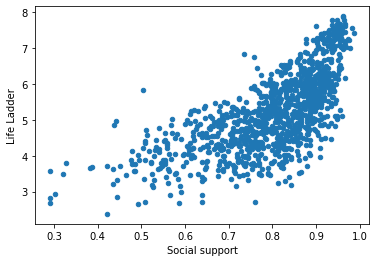

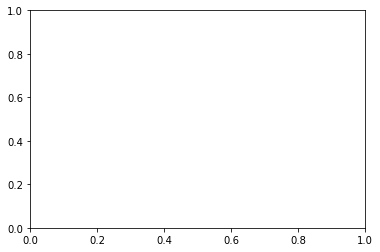

In [12]:
#Visualization
dff.plot.scatter(x="Social support", y = "Life Ladder")
dff['Social support cubed'] = dff["Social support"]**3
dff.plot.scatter(x="Social support squared", y = "Life Ladder", color = "red")


In [ ]:
#Visualization
dff.plot.scatter(x="Log GDP per capita", y = "Life Ladder")
#inserting a new column with exponential social support
#dff['Social support squared'] = dff["Social support"]**3
#dff.plot.scatter(x="Social support squared", y = "Life Ladder", color = "red")

In [ ]:
dff.plot.scatter(x="Healthy life expectancy at birth", y = "Life Ladder")
#dff['Life expectancy squared'] = dff["Healthy life expectancy at birth"]**3
dff['Life Ladder Log'] = np.log(dff["Life Ladder"])
dff.plot.scatter(x="Healthy life expectancy at birth", y = "Life Ladder Log", color = "red")


In [ ]:
dff.plot.scatter(x="Freedom to make life choices", y = "Life Ladder")
dff['Freedom to make life choices squared'] = dff["Freedom to make life choices"]**2
#dff['Life Ladder Log'] = np.log(dff["Life Ladder"])
dff.plot.scatter(x="Freedom to make life choices squared", y = "Life Ladder", color = "red")

In [ ]:
dff.plot.scatter(x="Generosity", y = "Life Ladder")
#dff['Generosity squared'] = dff["Generosity"]**2
#dff['Life Ladder squared'] = dff["Life Ladder"]**2
#dff['Life Ladder Log'] = np.log(dff["Life Ladder"])
#dff.plot.scatter(x="Generosity squared", y = "Life Ladder", color = "red")

In [ ]:
dff.plot.scatter(x="Perceptions of corruption", y = "Life Ladder")
dff['Perceptions of corruption squared'] = dff["Perceptions of corruption"]**2
dff['Life Ladder squared'] = dff["Life Ladder"]**2
dff.plot.scatter(x="Perceptions of corruption squared", y = "Life Ladder", color = "red")
#dff.plot.scatter(x="Perceptions of corruption squared", y = "Life Ladder squared", color = "green")

In [ ]:
dff.plot.scatter(x="Positive affect", y = "Life Ladder")
dff.plot.scatter(x="Negative affect", y = "Life Ladder")
#dff['Perceptions of corruption squared'] = dff["Perceptions of corruption"]**2
#dff.plot.scatter(x="Perceptions of corruption squared", y = "Life Ladder", color = "red")

In [13]:
#extracting India's values from dff to compare with Finland and Zimbabwe
dff = df
dff2 = dff[dff["Country name"] == "India"]
dff3 = dff[dff["Country name"] == "Finland"]
dff4 = dff[dff["Country name"] == "Zimbabwe"]

dff5 = [dff2,dff3]
res = pd.concat(dff5)
res

#df_merged = pd.merge(dff2, dff3, on='Country name', how='outer') #here id is common column

#df_merged

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social support cubed
732,India,2006,5.348,8.145,0.707,55.72,0.774,NaN,0.855,0.687,0.199,0.353393
733,India,2007,5.027,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253,0.184220
734,India,2008,5.146,8.220,0.684,56.56,0.756,-0.072,0.891,0.674,0.259,0.320014
735,India,2009,4.522,8.281,0.653,56.98,0.679,-0.026,0.895,0.771,0.301,0.278445
736,India,2010,4.989,8.349,0.605,57.40,0.783,0.058,0.863,0.697,0.267,0.221445
737,India,2011,4.635,8.387,0.553,57.70,0.838,-0.038,0.908,0.648,0.232,0.169112
738,India,2012,4.720,8.428,0.511,58.00,0.609,0.067,0.830,0.629,0.295,0.133433
739,India,2013,4.428,8.478,0.553,58.30,0.740,0.084,0.832,0.680,0.330,0.169112
740,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,0.711,0.285,0.239483
741,India,2015,4.342,8.604,0.610,58.90,0.777,-0.005,0.776,0.701,0.322,0.226981


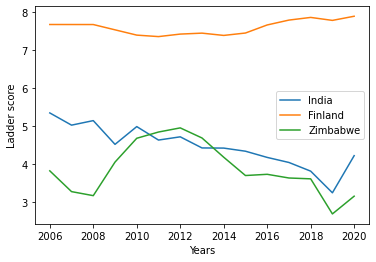

In [14]:
#dff2.plot.line(x = "year", y = "Life Ladder")
x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []
for rows in dff2.index:
    x1.append(dff2["year"][rows])
    y1.append(dff2["Life Ladder"][rows])
        
for rows in dff3.index:
    x2.append(dff3["year"][rows])
    y2.append(dff3["Life Ladder"][rows])

for rows in dff4.index:
    x3.append(dff4["year"][rows])
    y3.append(dff4["Life Ladder"][rows])

plot.plot(x1, y1, label = "India")
plot.plot(x2, y2, label = "Finland")
plot.plot(x3, y3, label = "Zimbabwe")
plot.xlabel('Years')
# Set the y axis label of the current axis.
plot.ylabel('Ladder score')
# Set a title of the current axes.
# show a legend on the plot
plot.legend()
# Display a figure.
plot.show()

In [15]:
dff2

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social support cubed
732,India,2006,5.348,8.145,0.707,55.72,0.774,NaN,0.855,0.687,0.199,0.353393
733,India,2007,5.027,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253,0.184220
734,India,2008,5.146,8.220,0.684,56.56,0.756,-0.072,0.891,0.674,0.259,0.320014
735,India,2009,4.522,8.281,0.653,56.98,0.679,-0.026,0.895,0.771,0.301,0.278445
736,India,2010,4.989,8.349,0.605,57.40,0.783,0.058,0.863,0.697,0.267,0.221445
737,India,2011,4.635,8.387,0.553,57.70,0.838,-0.038,0.908,0.648,0.232,0.169112
738,India,2012,4.720,8.428,0.511,58.00,0.609,0.067,0.830,0.629,0.295,0.133433
739,India,2013,4.428,8.478,0.553,58.30,0.740,0.084,0.832,0.680,0.330,0.169112
740,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,0.711,0.285,0.239483
741,India,2015,4.342,8.604,0.610,58.90,0.777,-0.005,0.776,0.701,0.322,0.226981


In [16]:
dff2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social support cubed
732,India,2006,5.348,8.145,0.707,55.72,0.774,NaN,0.855,0.687,0.199,0.353393
733,India,2007,5.027,8.204,0.569,56.14,0.729,-0.051,0.862,0.668,0.253,0.184220
734,India,2008,5.146,8.220,0.684,56.56,0.756,-0.072,0.891,0.674,0.259,0.320014
735,India,2009,4.522,8.281,0.653,56.98,0.679,-0.026,0.895,0.771,0.301,0.278445
736,India,2010,4.989,8.349,0.605,57.40,0.783,0.058,0.863,0.697,0.267,0.221445


In [17]:
df['Generosity']=df['Generosity'].fillna(df['Generosity'].mean())

In [18]:
df.isnull().sum()

Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
Social support cubed                0
dtype: int64

In [25]:
dff_x=df[['Log GDP per capita','Social support cubed','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Positive affect','Negative affect']]

In [26]:
dff_x

,Log GDP per capita,Social support cubed,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Positive affect,Negative affect
0,7.370,0.091734,50.80,0.718,0.168,0.518,0.258
1,7.540,0.168197,51.20,0.679,0.190,0.584,0.237
2,7.647,0.156591,51.60,0.600,0.121,0.618,0.275
3,7.620,0.141421,51.92,0.496,0.162,0.611,0.267
4,7.705,0.141421,52.24,0.531,0.236,0.710,0.268
...,...,...,...,...,...,...,...
1944,7.984,0.452985,54.40,0.733,-0.095,0.738,0.209
1945,8.016,0.428661,55.00,0.753,-0.098,0.806,0.224
1946,8.049,0.465484,55.60,0.763,-0.068,0.710,0.212
1947,7.950,0.437245,56.20,0.632,-0.064,0.716,0.235


In [27]:
dff_y=df[['Life Ladder']]

In [28]:
dff_y

,Life Ladder
0,3.724
1,4.402
2,4.758
3,3.832
4,3.783
...,...
1944,3.735
1945,3.638
1946,3.616
1947,2.694


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(dff_x,dff_y,test_size=0.7,random_state=0)

In [30]:
from sklearn.linear_model import LinearRegression
print(x_train)
ml= LinearRegression()
ml.fit(x_train,y_train)

      Log GDP per capita  Social support cubed  \
1127               9.054              0.607645   
673                8.773              0.611960   
1132               9.246              0.592704   
1938               7.729              0.629423   
1358               9.278              0.656235   
...                  ...                   ...   
1852               9.604              0.669922   
1287               9.416              0.533412   
1417              10.370              0.741218   
984                7.931              0.454757   
1154               9.755              0.547343   

      Healthy life expectancy at birth  Freedom to make life choices  \
1127                            61.300                         0.598   
673                             57.260                         0.694   
1132                            62.900                         0.595   
1938                            46.700                         0.665   
1358                            64.620 

LinearRegression()

In [31]:
y_pred=ml.predict(x_test)
print(y_pred)

[[3.96127827]
 [4.64826966]
 [5.39652917]
 [4.46671366]
 [4.0156358 ]
 [5.62400667]
 [6.34225466]
 [6.27893118]
 [5.66524278]
 [4.09527623]
 [3.43129634]
 [6.03726933]
 [6.13381022]
 [4.44342984]
 [5.8456072 ]
 [5.22450722]
 [4.35656366]
 [4.7569896 ]
 [5.41432212]
 [4.41141733]
 [5.90665223]
 [7.12809565]
 [4.3866229 ]
 [4.83003211]
 [3.8492363 ]
 [4.74532615]
 [6.45878382]
 [6.17725805]
 [4.8834042 ]
 [4.4577362 ]
 [5.6808406 ]
 [5.65179299]
 [5.934771  ]
 [5.47593073]
 [3.69826412]
 [4.6414161 ]
 [6.02926457]
 [7.17777425]
 [6.07582938]
 [6.13729745]
 [6.26408526]
 [6.29140338]
 [6.08878203]
 [6.34982963]
 [6.23768301]
 [5.31357164]
 [4.73999563]
 [5.03177102]
 [4.11577231]
 [4.92448816]
 [4.40212202]
 [5.70959482]
 [3.75062838]
 [5.08680257]
 [5.03811462]
 [3.81789022]
 [3.92631081]
 [4.52702828]
 [5.63493298]
 [5.53941749]
 [5.13745365]
 [4.80889202]
 [4.96913448]
 [5.19655275]
 [3.66154991]
 [4.65132516]
 [4.50607495]
 [4.02033337]
 [3.9391456 ]
 [4.35392953]
 [4.00426111]
 [4.98

In [32]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7392048248629318

In [33]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y_test, y_pred, squared=False)

In [34]:
rms

0.5641831494765763